In [1]:
# install.packages('ggplot2')
# install.packages("fpc")
library(ggplot2)
library(fpc)

In [2]:
#read the abalone data set
abnames = c('sex','length','diameter','height','weight.w','weight.s','weight.v','weight.sh','rings')
data = read.table('../data/abalone.data', header = FALSE, sep = ',', col.names = abnames)
head(data)
dim(data)

sex length diameter height weight.w weight.s weight.v weight.sh rings
1 M   0.455  0.365    0.095  0.5140   0.2245   0.1010   0.150     15   
2 M   0.350  0.265    0.090  0.2255   0.0995   0.0485   0.070      7   
3 F   0.530  0.420    0.135  0.6770   0.2565   0.1415   0.210      9   
4 M   0.440  0.365    0.125  0.5160   0.2155   0.1140   0.155     10   
5 I   0.330  0.255    0.080  0.2050   0.0895   0.0395   0.055      7   
6 I   0.425  0.300    0.095  0.3515   0.1410   0.0775   0.120      8

[1] 4177    9

In [3]:
summary(data)

 sex          length         diameter          height          weight.w     
 F:1307   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 I:1342   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1528   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
    weight.s         weight.v        weight.sh          rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.00

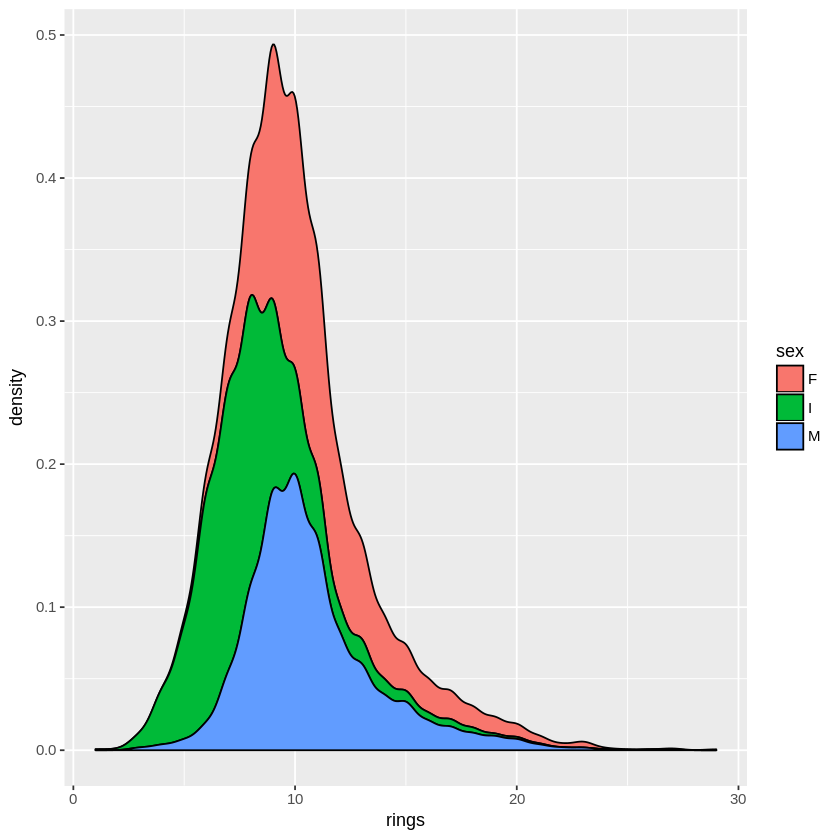

In [6]:
ggplot(data) + aes(rings, fill = sex) + geom_density(position = "stack")

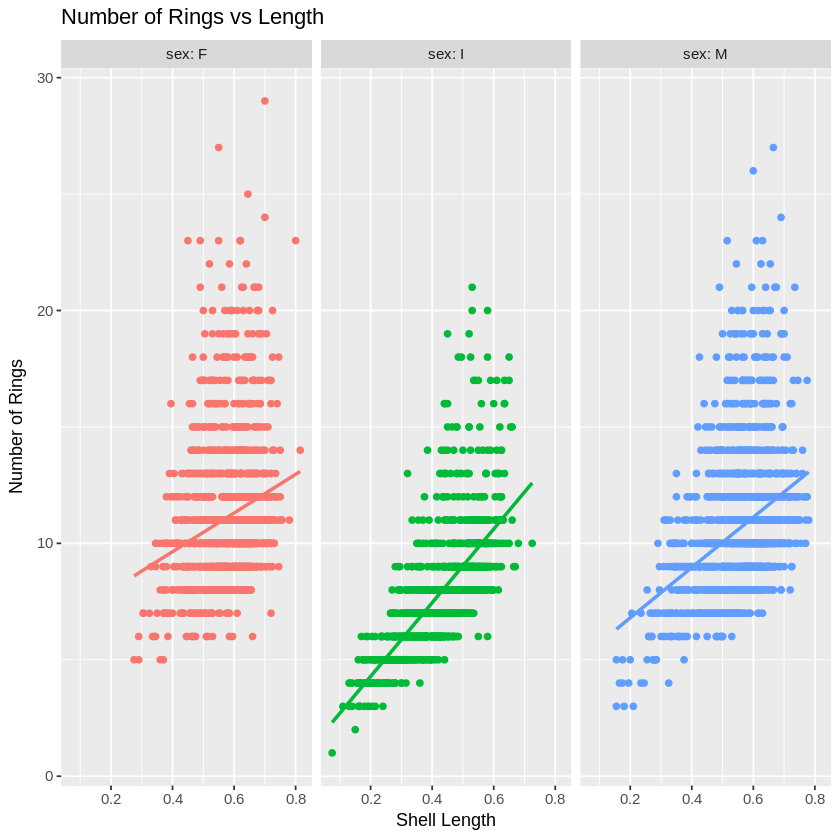

In [8]:
ggplot(data) + aes(length, rings, color = sex) + geom_point() + labs(x = "Shell Length", 
    y = "Number of Rings", title = "Number of Rings vs Length") + facet_grid(. ~ 
    sex, labeller = label_both) + stat_smooth(method = "lm", se = FALSE) + theme(legend.position = "none")

In [9]:
# There are height values of 0... which isn't possible if they didnt exist?
cat("Number of samples with 0.0 Height:", length(data[data$height==0,]))
data$height[data$height==0] = NA

Number of samples with 0.0 Height: 9

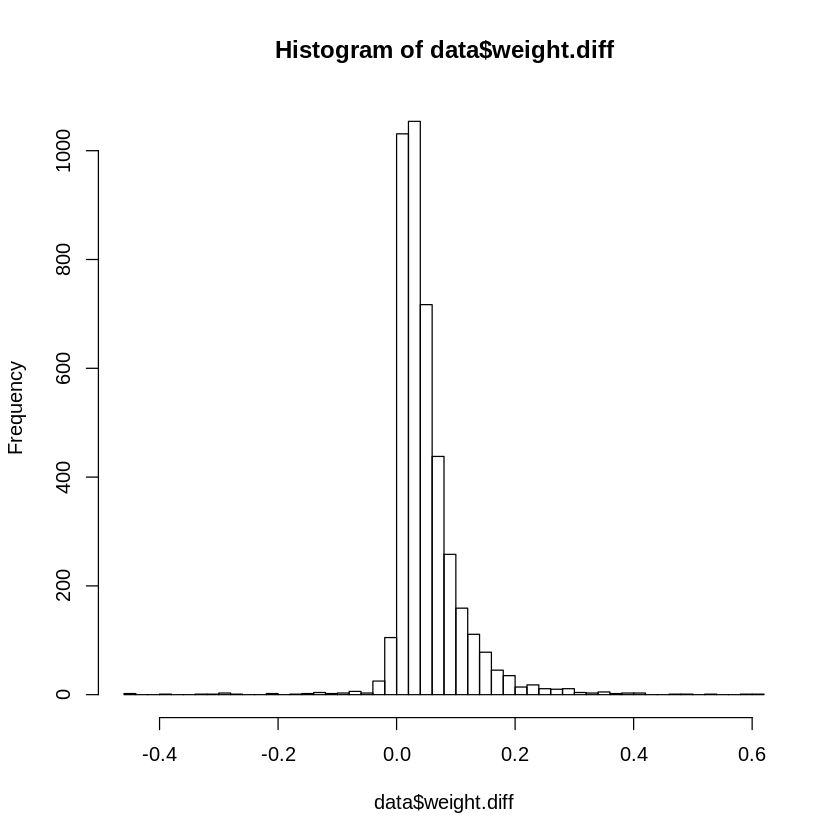

In [10]:
# based on the attribute description 
# the whole weight should be greater than the get + meat + shell 
# because they are bled out and dried
data$weight.diff = data$weight.w - (data$weight.v + data$weight.s + data$weight.sh)
par(mfrow=c(1,1))
hist(data$weight.diff,breaks=50)

In [11]:
# let's remove these ones from the data set because we can't trust the measurments
cat("Number of samples with 0.0 Height:", length(data[data$weight.diff < -.1,]))
data$height[data$weight.diff < -.1] = NA

Number of samples with 0.0 Height: 10

In [12]:
# remove na
abalone <- na.omit(data)
head(abalone)
dim(abalone)

sex length diameter height weight.w weight.s weight.v weight.sh rings
1 M   0.455  0.365    0.095  0.5140   0.2245   0.1010   0.150     15   
2 M   0.350  0.265    0.090  0.2255   0.0995   0.0485   0.070      7   
3 F   0.530  0.420    0.135  0.6770   0.2565   0.1415   0.210      9   
4 M   0.440  0.365    0.125  0.5160   0.2155   0.1140   0.155     10   
5 I   0.330  0.255    0.080  0.2050   0.0895   0.0395   0.055      7   
6 I   0.425  0.300    0.095  0.3515   0.1410   0.0775   0.120      8   
  weight.diff
1 0.0385     
2 0.0075     
3 0.0690     
4 0.0315     
5 0.0210     
6 0.0130

[1] 4156   10

In [13]:
# 0.0==heights removed
summary(abalone)

 sex          length         diameter          height          weight.w     
 F:1301   Min.   :0.075   Min.   :0.0550   Min.   :0.0100   Min.   :0.0020  
 I:1332   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4425  
 M:1523   Median :0.545   Median :0.4250   Median :0.1400   Median :0.8003  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1396   Mean   :0.8295  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1533  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
    weight.s         weight.v        weight.sh          rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3355   Median :0.1710   Median :0.2335   Median : 9.000  
 Mean   :0.3590   Mean   :0.1805   Mean   :0.2387   Mean   : 9.941  
 3rd Qu.:0.5016   3rd Qu.:0.2526   3rd Qu.:0.3276   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.00

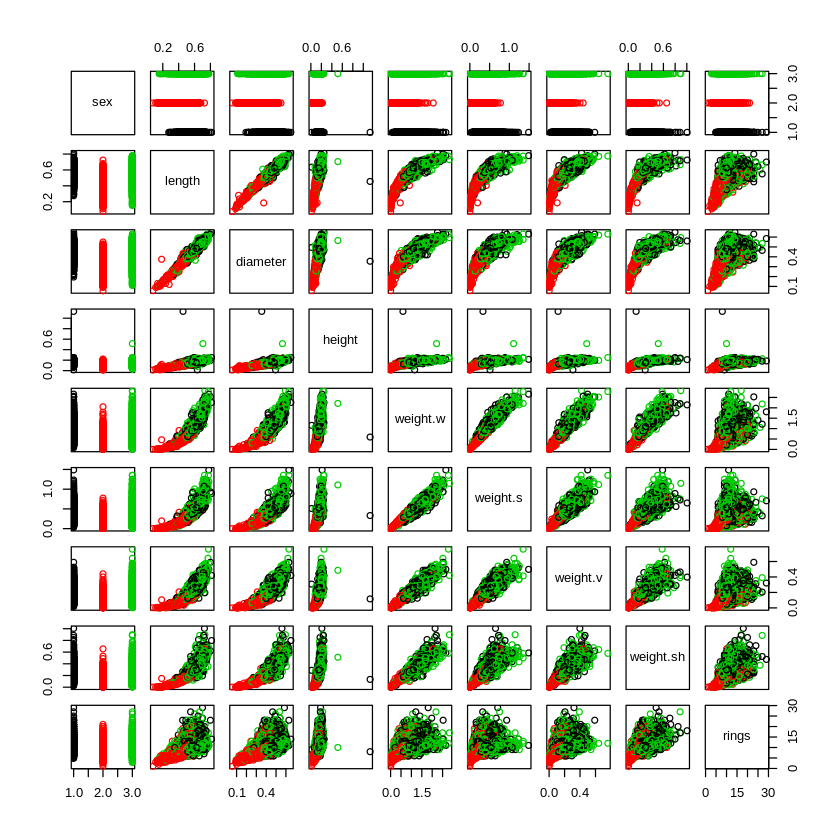

In [14]:
# Let's see feature correlation visually with distribution plots
plot(abalone[1:9], col = abalone$sex)

In [15]:
# Let's see how correlated the attributes are in numbers
as.matrix(cor(na.omit(abalone[,-1])))

length    diameter  height    weight.w  weight.s  weight.v 
length      1.0000000 0.9867503 0.8275657 0.9252678 0.8994190 0.9029129
diameter    0.9867503 1.0000000 0.8337840 0.9254346 0.8946341 0.8995993
height      0.8275657 0.8337840 1.0000000 0.8197876 0.7769769 0.7987646
weight.w    0.9252678 0.9254346 0.8197876 1.0000000 0.9712839 0.9671985
weight.s    0.8994190 0.8946341 0.7769769 0.9712839 1.0000000 0.9330946
weight.v    0.9029129 0.8995993 0.7987646 0.9671985 0.9330946 1.0000000
weight.sh   0.8985162 0.9062377 0.8188209 0.9567892 0.8849045 0.9087172
rings       0.5558546 0.5738243 0.5574049 0.5391414 0.4213986 0.5033712
weight.diff 0.5638961 0.5718367 0.5251126 0.6666877 0.5429051 0.5833820
            weight.sh rings     weight.diff
length      0.8985162 0.5558546 0.5638961  
diameter    0.9062377 0.5738243 0.5718367  
height      0.8188209 0.5574049 0.5251126  
weight.w    0.9567892 0.5391414 0.6666877  
weight.s    0.8849045 0.4213986 0.5429051  
weight.v    0.9087172 0.5033712 0.5833820  
weight.sh   1.0000000 0.6284059 0.6362019  
rings       0.6284059 1.0000000 0.5250928  
weight.diff 0.6362019 0.5250928 1.0000000

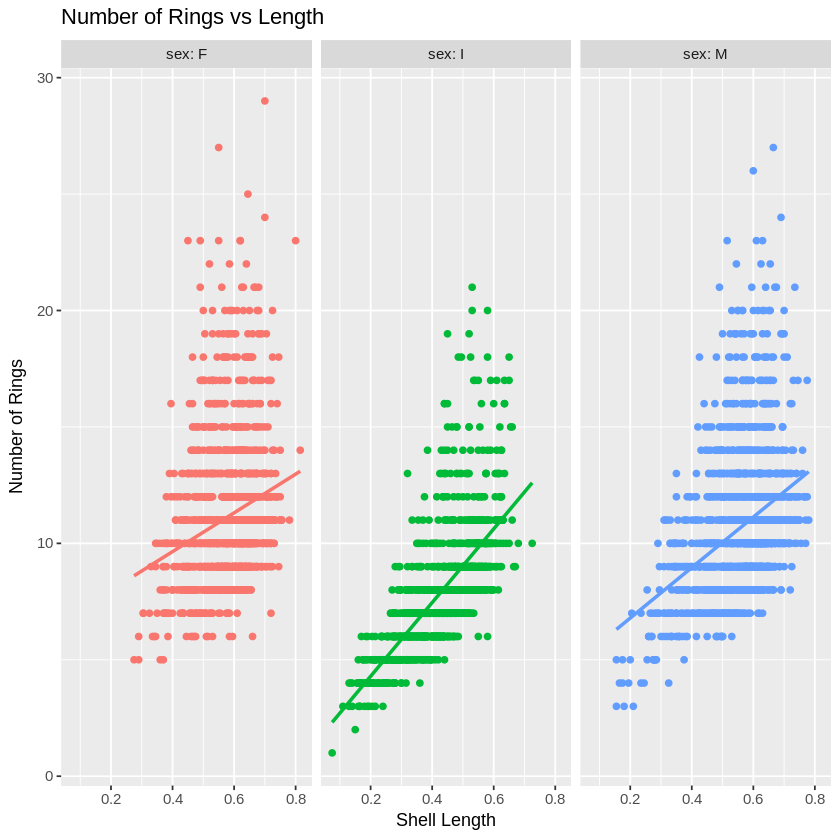

In [17]:
ggplot(abalone) + aes(length, rings, color = sex) + geom_point() + labs(x = "Shell Length", 
    y = "Number of Rings", title = "Number of Rings vs Length") + facet_grid(. ~ 
    sex, labeller = label_both) + stat_smooth(method = "lm", se = FALSE) + theme(legend.position = "none")